# Introduction to Statsmodels

## Normal Distribution Test with Q-Q plots

In [8]:
%matplotlib inline

from statsmodels.graphics.api import qqplot
import numpy as np

np.random.seed(0)

import warnings
warnings.filterwarnings('ignore')

import pandas as pd
pd.set_option('display.max_rows', 2)
pd.set_option('display.max_columns', 7)

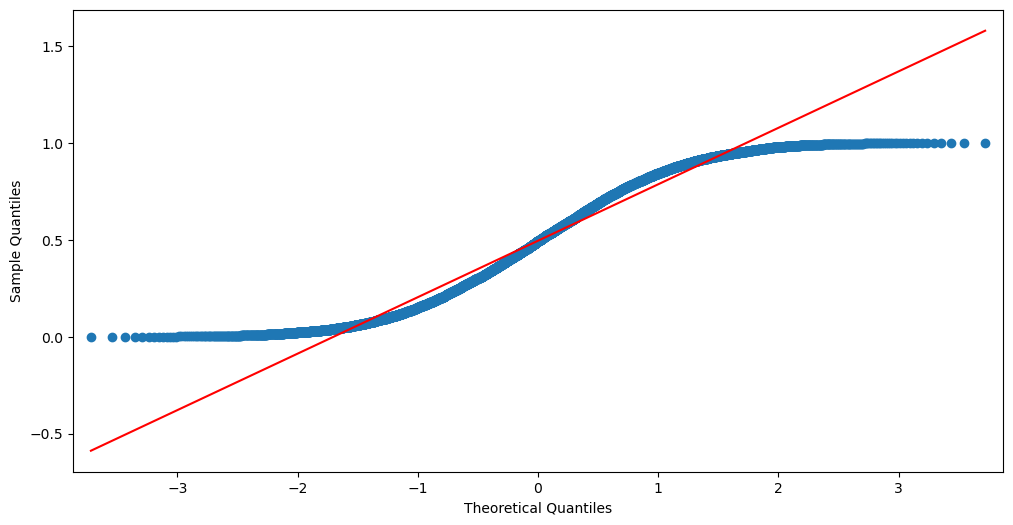

In [10]:
fig = qqplot(np.random.uniform(size=10000), line='s')
fig.set_size_inches(12, 6)
fig

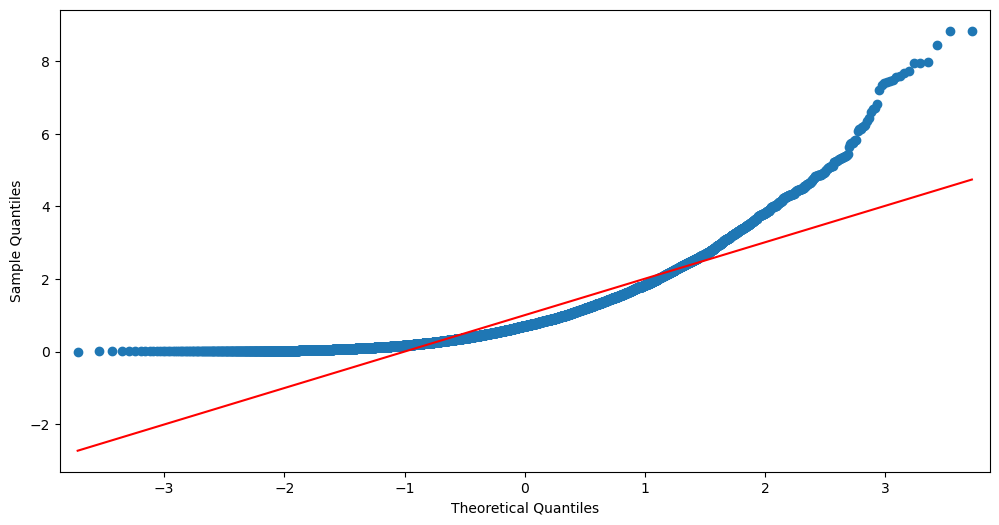

In [11]:
fig = qqplot(np.random.exponential(size=10000), line='s')
fig.set_size_inches(12, 6)
fig

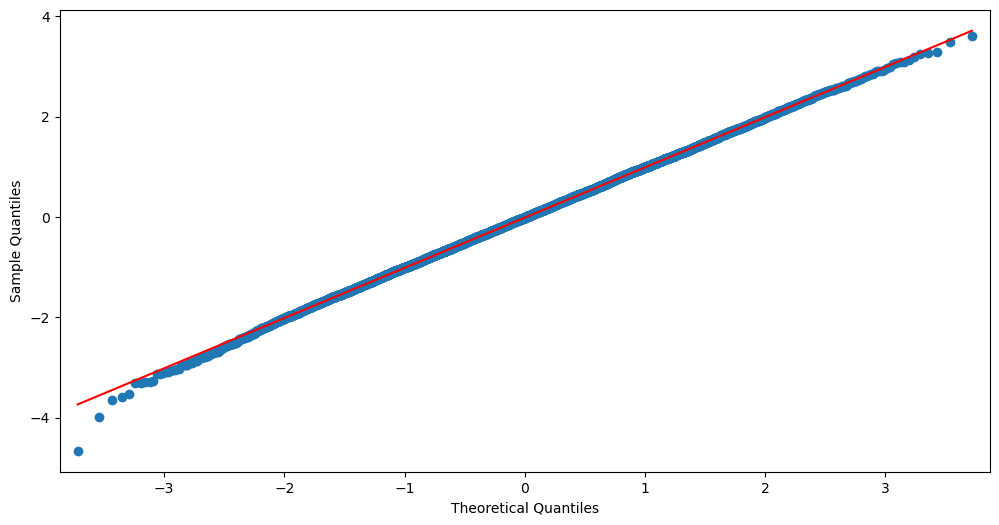

In [12]:
fig = qqplot(np.random.normal(size=10000), line='s')
fig.set_size_inches(12, 6)
fig

## Time Series Analysis with Statsmodels

In [13]:
import statsmodels.api as sm

In [14]:
sm.tsa.datetools.dates_from_range('2010', length=12)

[datetime.datetime(2010, 12, 31, 0, 0),
 datetime.datetime(2011, 12, 31, 0, 0),
 datetime.datetime(2012, 12, 31, 0, 0),
 datetime.datetime(2013, 12, 31, 0, 0),
 datetime.datetime(2014, 12, 31, 0, 0),
 datetime.datetime(2015, 12, 31, 0, 0),
 datetime.datetime(2016, 12, 31, 0, 0),
 datetime.datetime(2017, 12, 31, 0, 0),
 datetime.datetime(2018, 12, 31, 0, 0),
 datetime.datetime(2019, 12, 31, 0, 0),
 datetime.datetime(2020, 12, 31, 0, 0),
 datetime.datetime(2021, 12, 31, 0, 0)]

In [15]:
sm.tsa.datetools.dates_from_range('2010m1', length=120)

[datetime.datetime(2010, 1, 31, 0, 0),
 datetime.datetime(2010, 2, 28, 0, 0),
 datetime.datetime(2010, 3, 31, 0, 0),
 datetime.datetime(2010, 4, 30, 0, 0),
 datetime.datetime(2010, 5, 31, 0, 0),
 datetime.datetime(2010, 6, 30, 0, 0),
 datetime.datetime(2010, 7, 31, 0, 0),
 datetime.datetime(2010, 8, 31, 0, 0),
 datetime.datetime(2010, 9, 30, 0, 0),
 datetime.datetime(2010, 10, 31, 0, 0),
 datetime.datetime(2010, 11, 30, 0, 0),
 datetime.datetime(2010, 12, 31, 0, 0),
 datetime.datetime(2011, 1, 31, 0, 0),
 datetime.datetime(2011, 2, 28, 0, 0),
 datetime.datetime(2011, 3, 31, 0, 0),
 datetime.datetime(2011, 4, 30, 0, 0),
 datetime.datetime(2011, 5, 31, 0, 0),
 datetime.datetime(2011, 6, 30, 0, 0),
 datetime.datetime(2011, 7, 31, 0, 0),
 datetime.datetime(2011, 8, 31, 0, 0),
 datetime.datetime(2011, 9, 30, 0, 0),
 datetime.datetime(2011, 10, 31, 0, 0),
 datetime.datetime(2011, 11, 30, 0, 0),
 datetime.datetime(2011, 12, 31, 0, 0),
 datetime.datetime(2012, 1, 31, 0, 0),
 datetime.datetime(

## Error, Trend, Seasonality (ETS) Analysis of a Time Series

In [16]:
import pandas as pd
pd.set_option('display.max_columns', 7)

n_obs = 12 * 20
linear_trend = np.linspace(100, 200, num=n_obs)
cycle = np.sin(linear_trend) * 10
error_noise = np.random.randn(n_obs)
dataset = pd.DataFrame(linear_trend + cycle + error_noise,
                       index=sm.tsa.datetools.dates_from_range('2000m1', length=n_obs),
                      columns=['Price'])
dataset

,Price
2000-01-31,92.114370
...,...
2019-12-31,192.351286


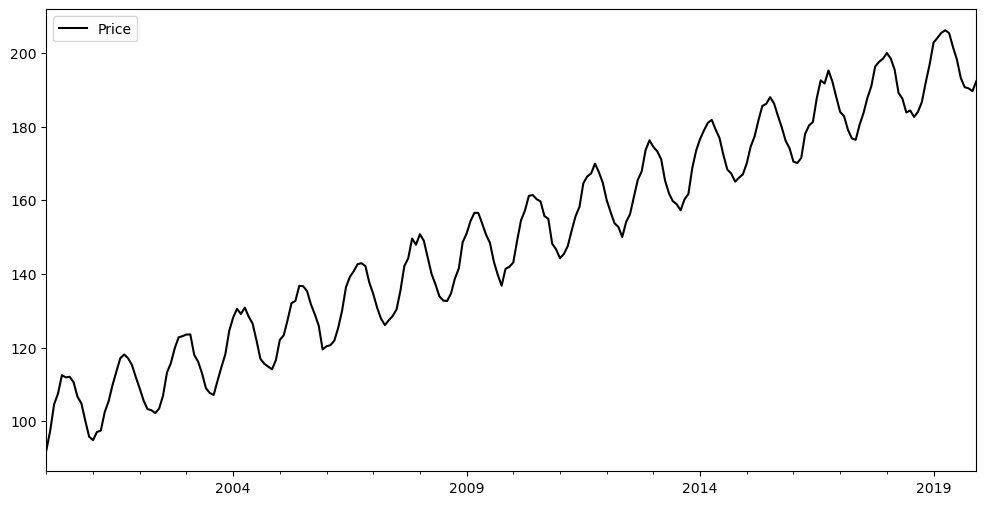

In [20]:
import matplotlib.pyplot as plt
dataset.plot(figsize=(12, 6), color='black')
plt.show()

### The Hodrick-Prescott filter

In [21]:
hp_cycle, hp_trend = sm.tsa.filters.hpfilter(dataset['Price'], lamb=129600)
decomp = dataset[['Price']]
decomp['HP_Cycle'] = hp_cycle
decomp['HP_Trend'] = hp_trend
decomp

,Price,HP_Cycle,HP_Trend
2000-01-31,92.114370,-9.086717,101.201087
...,...,...,...
2019-12-31,192.351286,-6.265656,198.616942


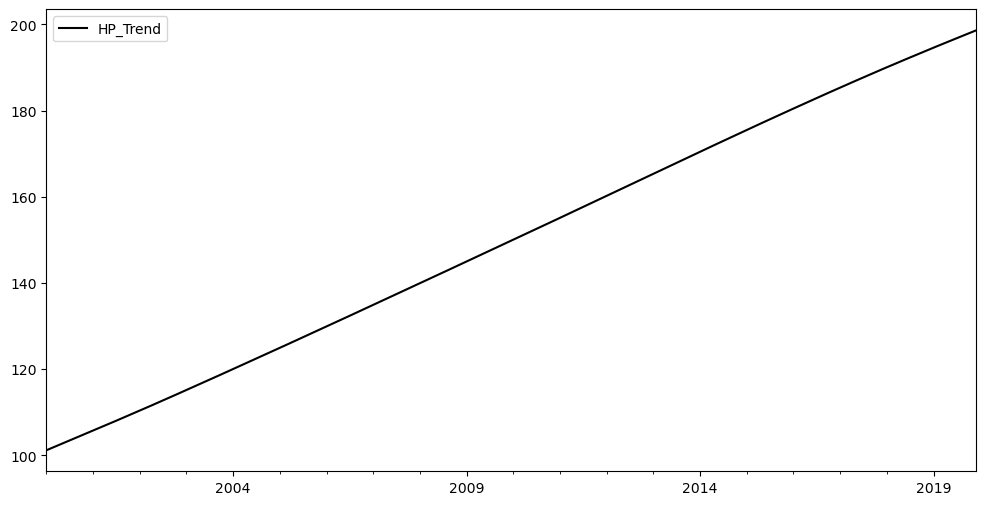

In [23]:
new_dataset = decomp[['HP_Trend']]
new_dataset.plot(figsize=(12, 6), color='black')
plt.show()

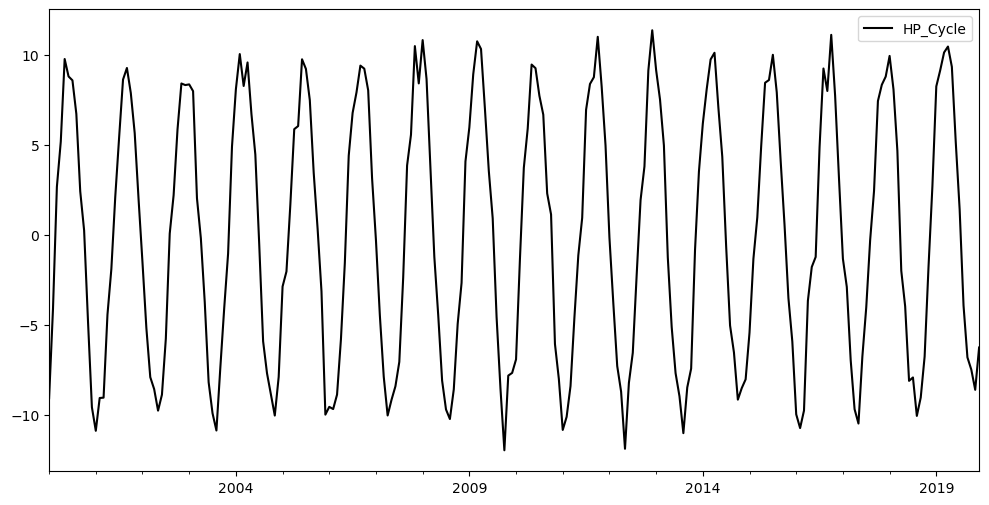

In [24]:
cycle_dataset = decomp[['HP_Cycle']]
cycle_dataset.plot(figsize=(12, 6), color='black')
plt.show()

### UnobservedComponents model

In [25]:
uc = sm.tsa.UnobservedComponents(dataset['Price'], level='lltrend', cycle=True, stochastic_cycle=True)
res_uc = uc.fit(method='powell', disp=True)
res_uc.summary()

Optimization terminated successfully.
         Current function value: 2.000615
         Iterations: 5
         Function evaluations: 388


<class 'statsmodels.iolib.summary.Summary'>
"""
                        Unobserved Components Results                         
==============================================================================
Dep. Variable:                  Price   No. Observations:                  240
Model:             local linear trend   Log Likelihood                -480.148
                   + stochastic cycle   AIC                            970.295
Date:                Fri, 29 Nov 2024   BIC                            987.615
Time:                        21:40:45   HQIC                           977.277
Sample:                    01-31-2000                                         
                         - 12-31-2019                                         
Covariance Type:                  opg                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
sigma2.irregular     0.3907      0.196      1.995      0.046       0.007       0.775
sigma2.level      2.285e-16      0.072   3.15e-15      1.000      -0.142       0.142
sigma2.trend      7.504e-20   2.56e-05   2.93e-15      1.000   -5.02e-05    5.02e-05
sigma2.cycle         1.6424      0.467      3.519      0.000       0.728       2.557
frequency.cycle      0.3491      0.012     29.090      0.000       0.326       0.373
===================================================================================
Ljung-Box (L1) (Q):                   0.27   Jarque-Bera (JB):                 1.61
Prob(Q):                              0.60   Prob(JB):                         0.45
Heteroskedasticity (H):               1.05   Skew:                             0.19
Prob(H) (two-sided):                  0.82   Kurtosis:                         2.85
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [26]:
decomp['UC_Cycle'] = res_uc.cycle.smoothed
decomp['UC_Trend'] = res_uc.level.smoothed
decomp['UC_Error'] = res_uc.resid
decomp

,Price,HP_Cycle,HP_Trend,UC_Cycle,UC_Trend,UC_Error
2000-01-31,92.114370,-9.086717,101.201087,-7.491786,99.786526,92.114370
...,...,...,...,...,...,...
2019-12-31,192.351286,-6.265656,198.616942,-7.920745,200.024326,1.981977


### statsmodels.tsa.seasonal.seasonal_decompose(...) method

In [27]:
from statsmodels.tsa.seasonal import seasonal_decompose
s_dc = seasonal_decompose(dataset['Price'], model='additive')
decomp['SDC_Cycle'] = s_dc.seasonal
decomp['SDC_Trend'] = s_dc.trend
decomp['SDC_Error'] = s_dc.resid
decomp[118:122]

,Price,HP_Cycle,HP_Trend,...,SDC_Cycle,SDC_Trend,SDC_Error
2009-11-30,141.366161,-7.829456,149.195616,...,0.662249,146.985674,-6.281762
...,...,...,...,...,...,...,...
2010-02-28,149.113468,-1.348770,150.462238,...,0.312941,149.865400,-1.064873


### Plotting of the Results of Hodrick-Prescott filter, the UnobservedComponents model and the seasonal_decompose method

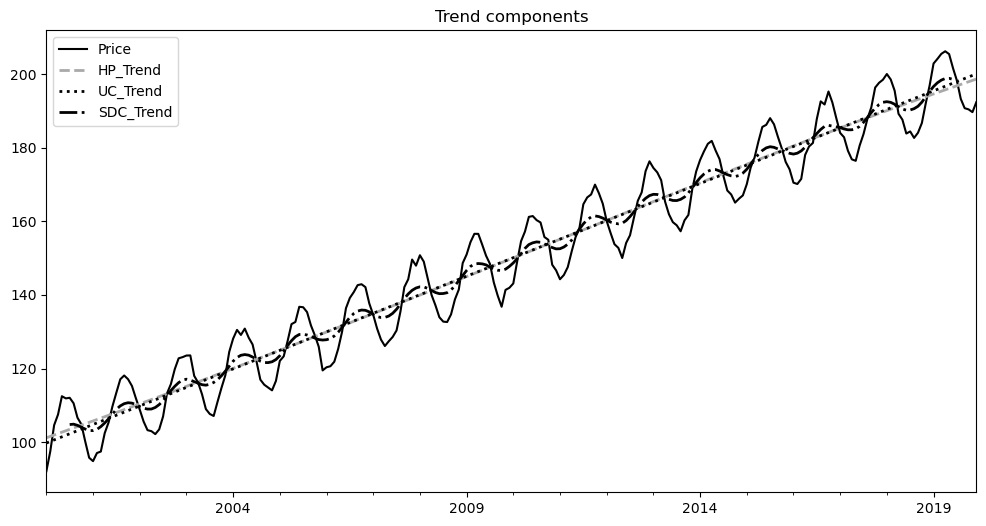

In [28]:
plt.title('Trend components')
decomp['Price'].plot(figsize=(12, 6), color='black', linestyle='-', legend='Price')
decomp['HP_Trend'].plot(figsize=(12, 6), color='darkgray', linestyle='--', lw=2, legend='HP_Trend')
decomp['UC_Trend'].plot(figsize=(12, 6), color='black', linestyle=':', lw=2, legend='UC_Trend')
decomp['SDC_Trend'].plot(figsize=(12, 6), color='black', linestyle='-.', lw=2, legend='SDC_Trend')

plt.show()

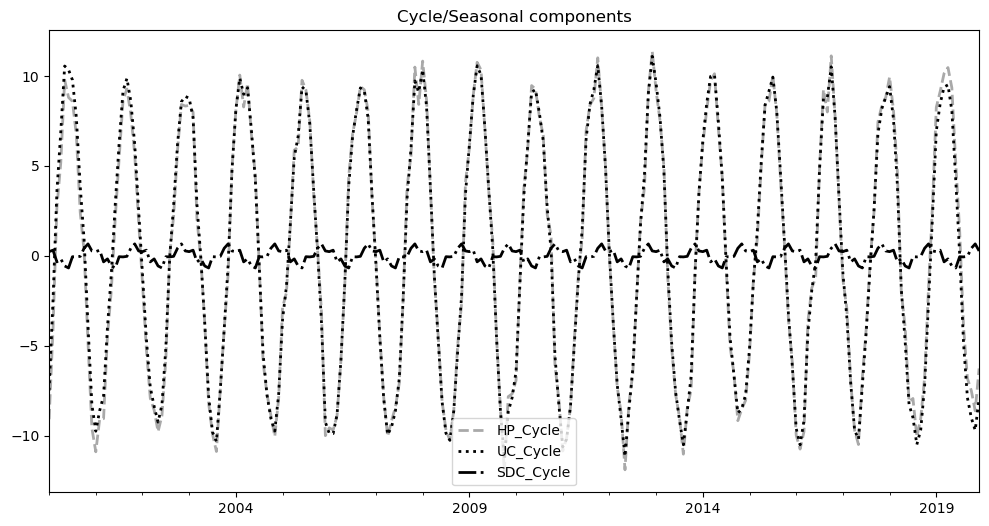

In [29]:
plt.title('Cycle/Seasonal components')
decomp['HP_Cycle'].plot(figsize=(12, 6), color='darkgray', linestyle='--', lw=2, legend='HP_Cycle')
decomp['UC_Cycle'].plot(figsize=(12, 6), color='black', linestyle=':', lw=2, legend='UC_Cycle')
decomp['SDC_Cycle'].plot(figsize=(12, 6), color='black', linestyle='-.', lw=2, legend='SDC_Cycle')

plt.show()

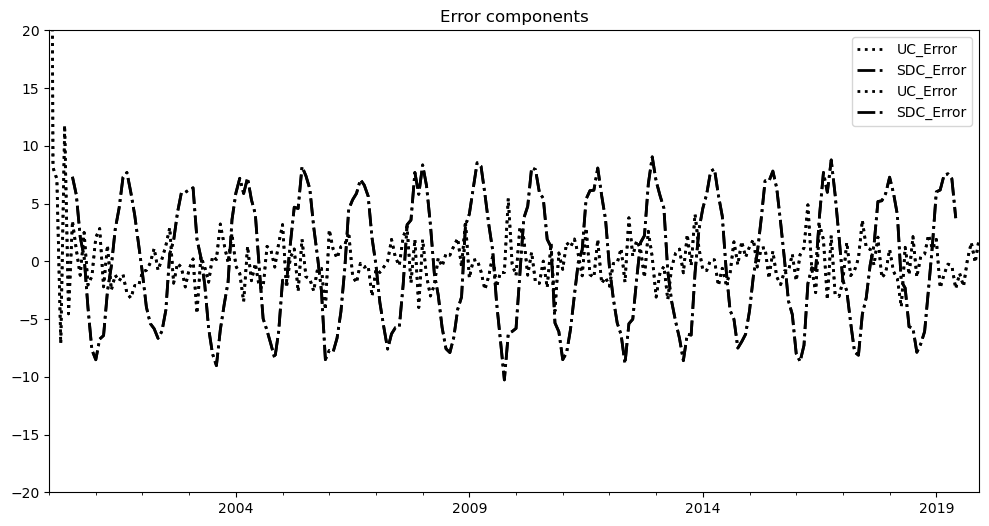

In [31]:
plt.title('Error components')
plt.ylim((-20, 20))
decomp['UC_Error'].plot(figsize=(12, 6), color='black', linestyle=':', lw=2, legend='UC_Error')
decomp['SDC_Error'].plot(figsize=(12, 6), color='black', linestyle='-.', lw=2, legend='SDC_Error')

plt.show()

## Augmented Dickey–Fuller Test for Stationarity of a Time Series

### Step 1 - Augmented Dickey-Fuller (ADF) test on the Prices

In [32]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(dataset['Price'])
print('Test Stat: {}\np value: {}\nLags: {}\nNum observations: {}'.format(result[0], result[1], result[2], result[3]))

Test Stat: 0.5555662709281205
p value: 0.9864676384826012
Lags: 15
Num observations: 224


### Step 2 - First Differencing on Prices

In [33]:
price_diff = (dataset['Price'].shift(-1) - dataset['Price']).fillna(0)
price_diff

2000-01-31    5.347842
                ...   
2019-12-31    0.000000
Name: Price, Length: 240, dtype: float64

### Step 3 - Augmented Dickey-Fuller (ADF) test on the Differenced Prices

In [34]:
result = adfuller(price_diff)
print('Test Stat: {}\np value: {}\nLags: {}\nNum observations: {}'.format(result[0], result[1], result[2], result[3]))

Test Stat: -10.001715233213844
p value: 1.8766607430607356e-17
Lags: 15
Num observations: 224


## Autocorrelation and Partial Autocorrelation of a Time Series

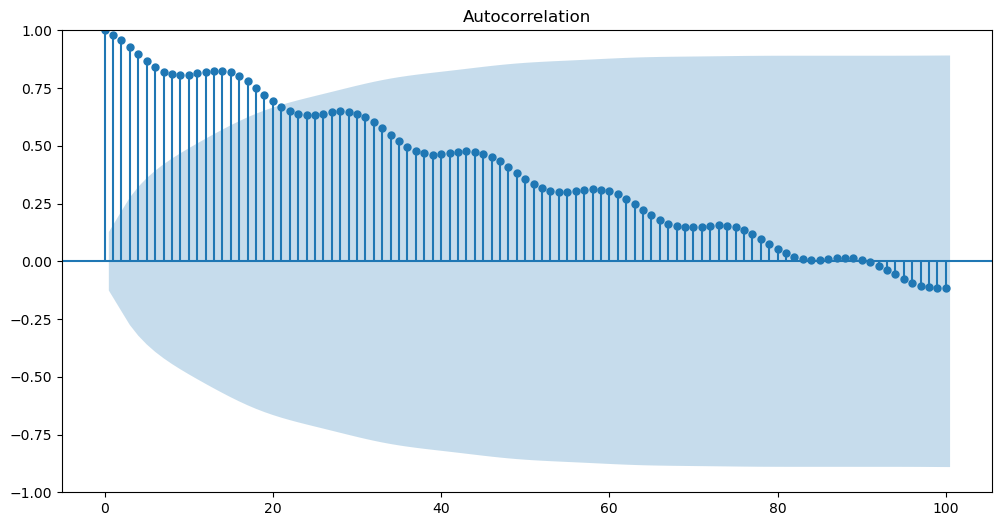

In [35]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
fig = plot_acf(dataset['Price'], lags=100)
fig.set_size_inches(12, 6)

plt.show()

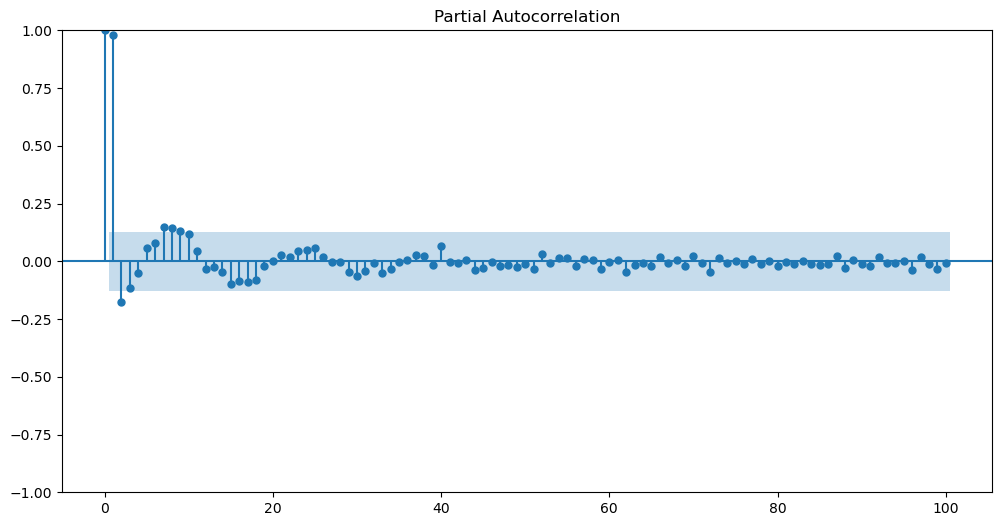

In [38]:
fig = plot_pacf(dataset['Price'], lags=100)
fig.set_size_inches(12, 6)

plt.show()

## Auto-Regressive Integrated Moving Average (ARIMA) Time Series Model with Statsmodels

In [40]:
from statsmodels.tsa.arima.model import ARIMA
arima = ARIMA(dataset['Price'], order=(36,1,2))
res_ar = arima.fit()
res_ar.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Price   No. Observations:                  240
Model:                ARIMA(36, 1, 2)   Log Likelihood                -369.927
Date:                Sat, 30 Nov 2024   AIC                            817.854
Time:                        13:00:40   BIC                            953.436
Sample:                    01-31-2000   HQIC                           872.490
                         - 12-31-2019                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8584      3.070     -0.280      0.780      -6.876       5.159
ar.L2         -0.7952      1.937     -0.411      0.681      -4.592       3.002
ar.L3         -0.5722      1.753     -0.326      0.744      -4.009       2.864
ar.L4         -0.4532      1.192     -0.380      0.704      -2.790       1.883
ar.L5         -0.4499      0.992     -0.453      0.650      -2.395       1.495
ar.L6         -0.4920      1.066     -0.461      0.645      -2.582       1.598
ar.L7         -0.5104      1.200     -0.425      0.670      -2.862       1.841
ar.L8         -0.5068      1.232     -0.411      0.681      -2.921       1.908
ar.L9         -0.4940      1.213     -0.407      0.684      -2.871       1.883
ar.L10        -0.5008      1.163     -0.431      0.667      -2.780       1.778
ar.L11        -0.3826      1.202     -0.318      0.750      -2.738       1.973
ar.L12        -0.3166      0.830     -0.381      0.703      -1.944       1.311
ar.L13        -0.3072      0.717     -0.429      0.668      -1.712       1.098
ar.L14        -0.1810      0.739     -0.245      0.807      -1.630       1.268
ar.L15        -0.0370      0.362     -0.102      0.918      -0.746       0.672
ar.L16         0.0269      0.104      0.258      0.796      -0.178       0.232
ar.L17         0.1391      0.130      1.068      0.286      -0.116       0.394
ar.L18         0.0959      0.398      0.241      0.810      -0.685       0.876
ar.L19         0.1021      0.214      0.477      0.633      -0.317       0.521
ar.L20         0.2142      0.255      0.841      0.400      -0.285       0.713
ar.L21         0.3220      0.592      0.544      0.586      -0.838       1.482
ar.L22         0.5070      0.854      0.594      0.553      -1.166       2.180
ar.L23         0.4785      1.333      0.359      0.720      -2.135       3.092
ar.L24         0.4094      1.121      0.365      0.715      -1.788       2.607
ar.L25         0.3640      0.915      0.398      0.691      -1.430       2.158
ar.L26         0.3281      0.831      0.395      0.693      -1.301       1.957
ar.L27         0.4338      0.759      0.571      0.568      -1.054       1.922
ar.L28         0.4883      1.108      0.441      0.660      -1.684       2.660
ar.L29         0.6348      1.206      0.526      0.599      -1.729       2.999
ar.L30         0.5527      1.615      0.342      0.732      -2.613       3.719
ar.L31         0.5503      1.269      0.434      0.665      -1.937       3.038
ar.L32         0.5564      1.302      0.427      0.669      -1.996       3.108
ar.L33         0.6805      1.319      0.516      0.606      -1.904       3.265
ar.L34         0.4780      1.674      0.286      0.775      -2.802       3.758
ar.L35         0.3783      0.968      0.391      0.696      -1.519       2.276
ar.L36         0.0807      0.816      0.099      0.921      -1.518       1.680
ma.L1          0.0819      3.056      0.027      0.979      -5.908       6.071
ma.L2          0.0521      0.546      0.096      0.924      -1.017       1.121
si

In [41]:
dataset

,Price
2000-01-31,92.114370
...,...
2019-12-31,192.351286


In [42]:
dataset['PredPrice'] = res_ar.predict(dataset.index[0], dataset.index[-1])
dataset

,Price,PredPrice
2000-01-31,92.114370,0.000000
...,...,...
2019-12-31,192.351286,191.349058


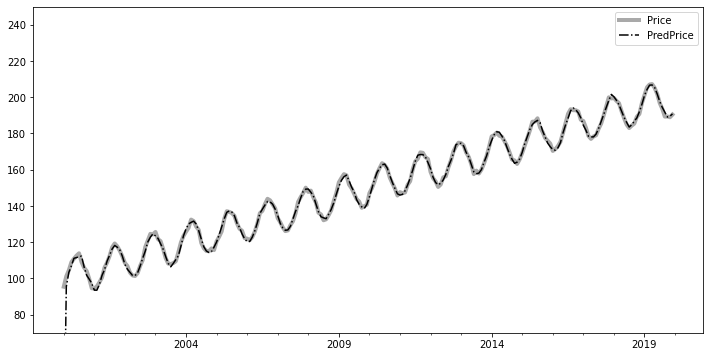

In [24]:
plt.ylim(70, 250)
dataset['Price'].plot(figsize=(12, 6), color='darkgray', linestyle='-', lw=4, legend='Price')
dataset['PredPrice'].plot(figsize=(12, 6), color='black', linestyle='-.', legend='PredPrice')

In [44]:
extended_dataset = pd.DataFrame(index=sm.tsa.datetools.dates_from_range('2020m1', length=48))
extended_dataset = pd.concat([dataset, extended_dataset])
extended_dataset

,Price,PredPrice
2000-01-31,92.11437,0.0
...,...,...
2023-12-31,NaN,NaN


In [45]:
extended_dataset['PredPrice'] = res_ar.predict(extended_dataset.index[0], extended_dataset.index[-1])
extended_dataset

,Price,PredPrice
2000-01-31,92.11437,0.000000
...,...,...
2023-12-31,NaN,221.705271


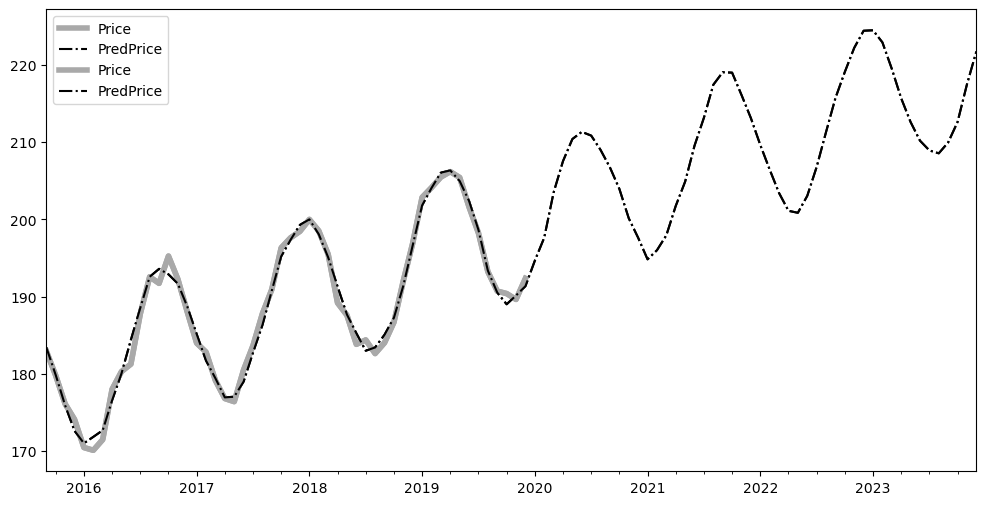

In [47]:
extended_dataset['Price'].iloc[-100:].plot(figsize=(12, 6), color='darkgray', linestyle='-', lw=4, legend='Price')
extended_dataset['PredPrice'].iloc[-100:].plot(figsize=(12, 6), color='black', linestyle='-.', legend='PredPrice')

plt.show()

# Seasonal Auto-Regressive Integrated Moving Average with Exogenous Variables (SARIMAX) Time Series Model with pmdarima

                                        SARIMAX Results                                        
Dep. Variable:                                       y   No. Observations:                  240
Model:             SARIMAX(2, 1, 1)x(2, 0, [1, 2], 12)   Log Likelihood                -423.821
Date:                                 Sat, 30 Nov 2024   AIC                            865.643
Time:                                         13:15:36   BIC                            896.931
Sample:                                     01-31-2000   HQIC                           878.251
                                          - 12-31-2019                                         
Covariance Type:                                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.3895      0.050      7.812      0.000       0.292       0

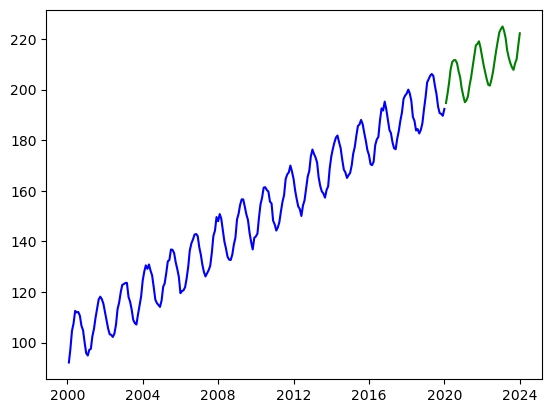

             PredPrice
2020-01-31  194.699480
...                ...
2023-12-31  222.257567

[48 rows x 1 columns]
[[192.40954994 196.98940954]
 [195.88847198 200.61419774]
 [200.32514077 205.10662459]
 [205.60355423 210.39699755]
 [208.47826798 213.27623824]
 [209.2193436  214.01949262]
 [209.24879142 214.05040098]
 [208.11162201 212.9144186 ]
 [204.96222988 209.76610311]
 [202.47586693 207.28076603]
 [198.09388167 202.89976476]
 [195.11886237 199.92568225]
 [192.58804888 197.40338487]
 [193.24523285 198.06288015]
 [194.92246038 199.74186145]
 [199.03457212 203.85529518]
 [202.32727841 207.14919276]
 [206.52725604 211.35030005]
 [210.74583598 215.56998482]
 [215.01821418 219.84345705]
 [215.63557213 220.46190482]
 [216.66223966 221.48966103]
 [214.16369929 218.99220876]
 [210.53883283 215.36842623]
 [207.01531113 211.93147529]
 [204.43806488 209.35674735]
 [201.57135095 206.49039616]
 [199.39258514 204.31170196]
 [199.11601447 204.03544783]
 [201.52911741 206.4490499 ]
 [204.6649053  

In [48]:
import pmdarima as pm
model = pm.auto_arima(dataset['Price'], seasonal=True, stepwise=True, m=12)
print(model.summary())

extended_dataset = pd.DataFrame(index=sm.tsa.datetools.dates_from_range('2020m1', length=48))

extended_dataset['PredPrice'], conf_int = model.predict(48, return_conf_int=True, alpha=0.05)

plt.plot(dataset['Price'], c='blue')
plt.plot(extended_dataset['PredPrice'], c='green')
plt.show()
print(extended_dataset)
print(conf_int)

# Time Series Forecasting Using Facebook’s Prophet

            ds           y
0   2000-01-31   95.434035
..         ...         ...
239 2019-12-31  190.440912

[240 rows x 2 columns]


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


            ds        yhat  yhat_lower  yhat_upper
283 2023-08-31  217.394516  208.340574  226.340332
..         ...         ...         ...         ...
287 2023-12-31  219.414306  209.761076  228.938440

[5 rows x 4 columns]


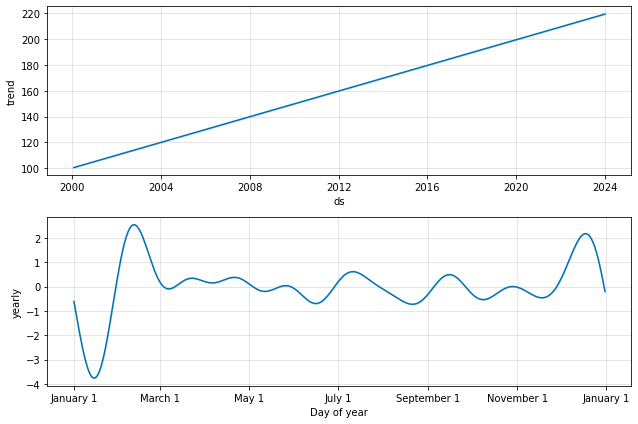

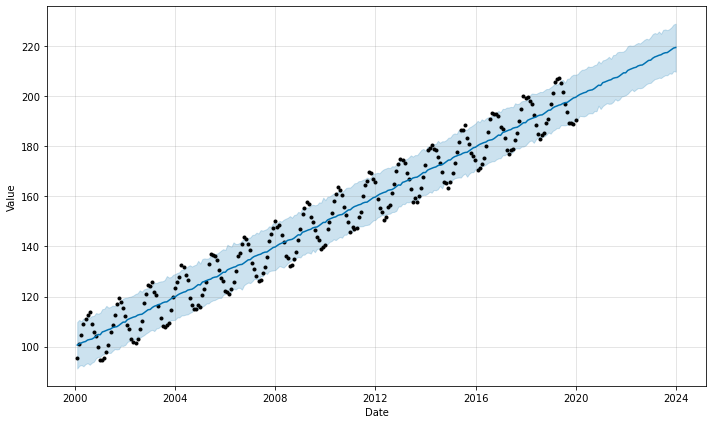

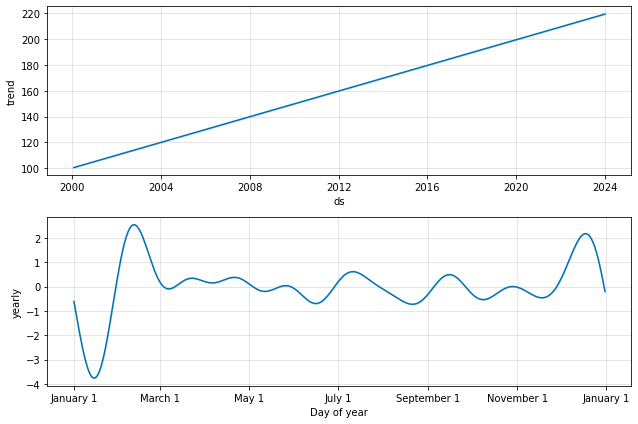

In [29]:
from fbprophet import Prophet

prophet_dataset = dataset.rename(columns={'Price' : 'y'}).rename_axis('ds').drop('PredPrice', 1).reset_index()

print(prophet_dataset)
model = Prophet()
model.fit(prophet_dataset)
df_forecast = model.make_future_dataframe(periods=48, freq='M')
df_forecast = model.predict(df_forecast)
print(df_forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail())
model.plot(df_forecast, xlabel='Date', ylabel='Value')
model.plot_components(df_forecast)